In [1]:
import numpy as np
from scipy.spatial import distance
from scipy.sparse.csgraph import minimum_spanning_tree

In [2]:
#http://www.math.uwaterloo.ca/tsp/data/index.html
srcPath = '../data/wi29.tsp'
dstPath = '../data/wi29.bin'

In [3]:
tsp = open(srcPath, 'r')
header = dict()
line = tsp.readline().rstrip('\n')
while ("NODE_COORD_SECTION" not in line):
    (key, value) = line.split(" : ")
    header[key] = value
    line = tsp.readline().rstrip('\n')

assert (header["TYPE"]=="TSP")
assert (header["EDGE_WEIGHT_TYPE"]=="EUC_2D")
nodes = int(header["DIMENSION"])

cityCoords = np.zeros((nodes, 2))

line = tsp.readline().rstrip('\n')
while ("EOF" not in line):
    (i, lat, long) = line.split(" ")
    i = int(i)-1
    lat = float(lat)
    long = float(long)
    cityCoords[i, 0] = lat
    cityCoords[i, 1] = long
    line = tsp.readline().rstrip('\n')
tsp.close()

In [4]:
cityCoords=cityCoords[:nodes,:nodes];
dist = distance.cdist(cityCoords, cityCoords, 'euclidean')
minst = minimum_spanning_tree(dist)
maxst = -minimum_spanning_tree(-dist)
distRoot = np.zeros((nodes+1,nodes+1))
distRoot[1:,1:] = dist

In [5]:
data = np.empty(3+(nodes+1)**2, dtype=np.float64)
data[0] = nodes+1 # number of nodes
data[1] = np.sum(minst) #lower bound, MST
data[2] = np.sum(maxst) #upper bound, 2*MST iff euc2d
data[3:] = distRoot.reshape((nodes+1)**2)

In [6]:
outFile = open(dstPath, "wb")
outFile.write(data.tobytes())
outFile.close()

In [24]:
import matplotlib.pyplot as plt

In [27]:
data = np.genfromtxt('../data/tsp_0.csv_filtered.csv', delimiter=';', names=True, dtype=None, encoding=None)
node_idx = np.ones(data.shape[0], dtype=bool) # plot all nodes
node_idx = np.bitwise_and(node_idx, data[:]['Select'] == 1); # plot nodes where the moves have been played

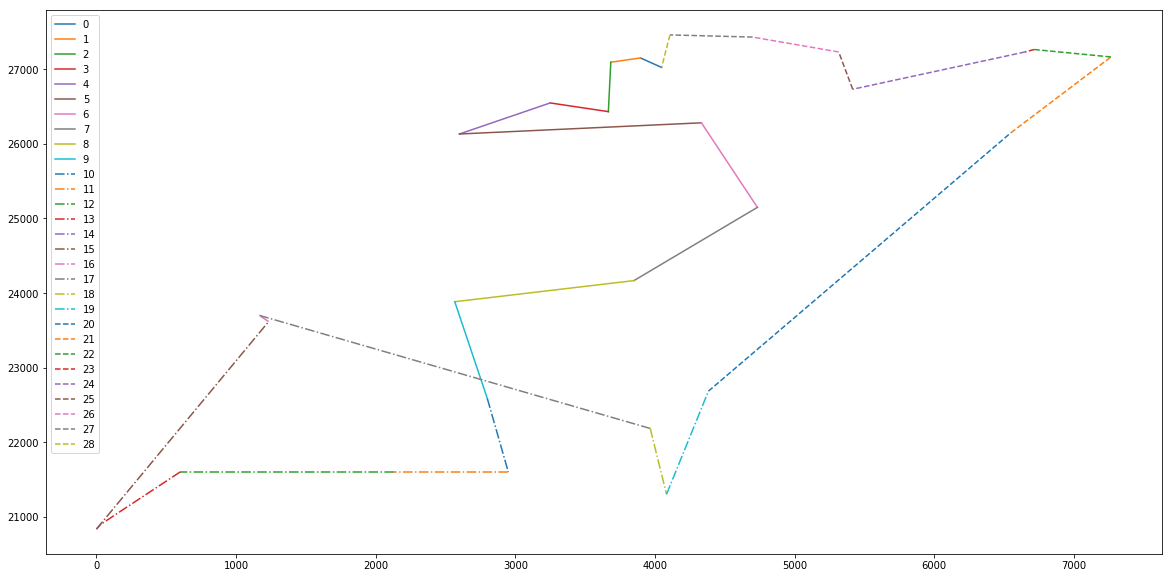

In [23]:
#TSP_Vertex result plot
tour = np.array(data[node_idx]['Move'], dtype=int)
tour = np.append(tour, tour[0]) # draw edge between first and last

idx=0
linestyles = ['-','-.','--']
plt.figure(figsize=(20,10))
v2 = tour[0]-1
for i in range(1, len(tour)):
    v1 = v2
    v2 = tour[i]-1
    city1 = cityCoords[v1,:]
    city2 = cityCoords[v2,:]
    x = [city1[1], city2[1]]
    y = [city1[0], city2[0]]
    x = np.max(cityCoords[:,1])-x
    plt.plot(x, y, linestyle=linestyles[idx//10], label=idx)
    idx+=1
plt.legend()

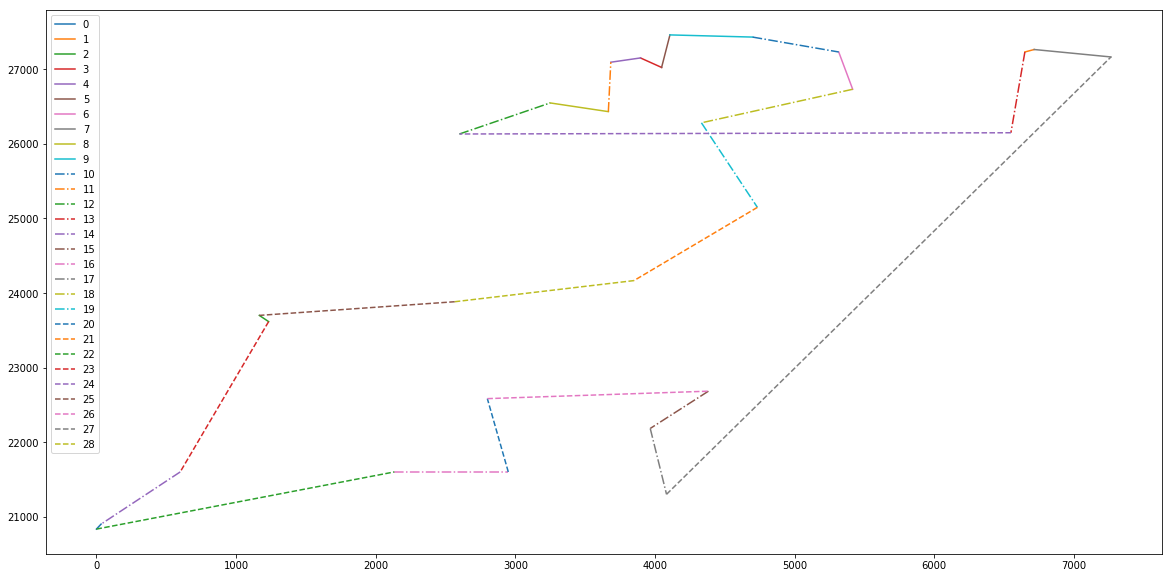

In [28]:
#TSP_Edge result plot
edges = data[node_idx]['Move']

idx=0
linestyles = ['-','-.','--']
plt.figure(figsize=(20,10))
for edge in edges:
    edge = np.array(edge.split(" "), dtype=int)
    edge -= 1 # remove root
    city1 = cityCoords[edge[0],:]
    city2 = cityCoords[edge[1],:]
    x = [city1[1], city2[1]]
    y = [city1[0], city2[0]]
    x = np.max(cityCoords[:,1])-x
    plt.plot(x, y, linestyle=linestyles[idx//10], label=idx)
    idx+=1
plt.legend()

In [161]:
# brute force optimum search
_nodeCount = 10
import itertools
perms=itertools.permutations(np.arange(0, _nodeCount, 1))
optimum=np.inf;
for perm in perms:
    length=0
    #print(perm)
    for i in range(len(perm)-1):
        v1=perm[i]
        v2=perm[i+1]
        length+=dist[v1,v2]
        #print(dist[v1,v2])

    v1=perm[0]
    v2=perm[-1]
    length+=dist[v1,v2]
    optimum=np.min((optimum,length))
    #print(length)
    #print(dist[v1,v2])
print(optimum)

12349.980743996226
